In [19]:
import numpy as np
import aniposelib
import toml
import pandas as pd
from aniposelib.boards import CharucoBoard, Checkerboard
from aniposelib.cameras import Camera, CameraGroup
from aniposelib.utils import load_pose2d_fnames

import os

In [20]:
# calibrate the cameras for 3d

do_cali = 1

#vidnames = [['camera-1_new_position_20221107.mp4'],
#            ['camera-2_new_position_20221107.mp4'],
#            ['camera-3_new_position_20221107.mp4']]
vidnames = [['camera-1_new_position_20221109_merge.mp4'],
            ['camera-2_new_position_20221109_merge.mp4'],
            ['camera-3_new_position_20221109_merge.mp4']]

cam_names = ['1', '2', '3']

n_cams = len(vidnames)

board = Checkerboard(8, 6,
                     square_length=1, # here, in mm but any unit works
                     manually_verify=False)


# the videos provided are fisheye, so we need the fisheye option
cgroup = CameraGroup.from_names(cam_names, fisheye=False)



In [21]:
if do_cali: 
    # this will take about 15 minutes (mostly due to detection)
    # it will detect the charuco board in the videos,
    # then calibrate the cameras based on the detections, using iterative bundle adjustment
    cgroup.calibrate_videos(vidnames, board)

    # if you need to save and load
    # example saving and loading for later
    cgroup.dump('calibration.toml')

camera-1_new_position_20221109_merge.mp4


100%|█████████████████████████████| 2156/2156 [07:40<00:00,  4.69it/s]


1268 boards detected
camera-2_new_position_20221109_merge.mp4


100%|█████████████████████████████| 2204/2204 [06:51<00:00,  5.36it/s]


1010 boards detected
camera-3_new_position_20221109_merge.mp4


100%|█████████████████████████████| 2176/2176 [05:45<00:00,  6.30it/s]


1706 boards detected
defaultdict(<class 'int'>,
            {('1', '2'): 696,
             ('1', '3'): 1037,
             ('2', '1'): 696,
             ('2', '3'): 930,
             ('3', '1'): 1037,
             ('3', '2'): 930})
error:  149.70302708447824
n_samples: 100
{(0, 1): (2907, array([ 70.20598136, 230.55046939])),
 (0, 2): (2907, array([ 54.77703431, 181.230229  ])),
 (1, 2): (2907, array([ 65.60543754, 270.71555362]))}
error: 155.09, mu: 70.2, ratio: 0.153
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1159e+06                                    3.31e+06    
       1              2         9.3173e+05      1.84e+05       6.80e+01       7.88e+06    
       2              3         6.9988e+05      2.32e+05       1.46e+02       6.74e+06    
       3              4         6.1956e+05      8.03e+04       8.87e+01       3.56e+06    
       4              6         6.0757e+05      1.20e+04       1.95e+01 

{(0, 1): (2916, array([ 56.65025611, 175.82245327])),
 (0, 2): (2916, array([ 35.27896548, 174.70734083])),
 (1, 2): (2916, array([ 50.2398332 , 227.16582064]))}
error: 136.72, mu: 56.7, ratio: 0.166
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.0563e+05                                    5.35e+05    
       1              2         3.6898e+05      2.37e+05       2.23e+02       2.95e+05    
       2              4         3.3902e+05      3.00e+04       6.91e+01       2.06e+05    
       3              5         3.3352e+05      5.50e+03       4.84e+01       1.06e+05    
       4              6         3.3203e+05      1.49e+03       7.38e+01       1.09e+05    
       5              7         3.3148e+05      5.43e+02       3.08e+01       3.74e+04    
       6              8         3.3132e+05      1.63e+02       1.47e+01       5.88e+03    
       7              9         3.3128e+05      3.46e+01       4.02e+00 

In [22]:
if not do_cali:
    ## example of loading calibration from a file
    ## you can also load the provided file if you don't want to wait 15 minutes
    cgroup = CameraGroup.load('calibration.toml')


In [23]:
## example triangulation without filtering, should take < 15 seconds
date_tgt = '20221128'
animal1 = 'Eddie'
animal2 = 'Sparkle'
singlecam_ana_type = "DLC_dlcrnetms5_marmoset_tracking_with_middle_cameraSep1shuffle1_150000"

current_dir = os.getcwd()
add_date_dir = current_dir+'/anipose_3d_h5_files/'+date_tgt+'_'+animal1+'_'+animal2
bodyparts_3d_anipose_file = add_date_dir+'/'+date_tgt+'_'+animal1+'_'+animal2+'_anipose.h5'
if os.path.exists(bodyparts_3d_anipose_file):
    do_3dconstruct = 0
else:
    do_3dconstruct = 1
do_3dconstruct=1
    
if do_3dconstruct:   

    twocamera_videos_cam12 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1+"_"+animal2+"_camera12/"
    twocamera_videos_cam23 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1+"_"+animal2+"_camera23/"

    bodyparts_cam1_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered.h5"
    bodyparts_cam2_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered.h5"
    bodyparts_cam3_cam23 = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered.h5"

    bodyparts_3d_cam12_DLC = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_weikang.h5"
    bodyparts_3d_cam23_DLC = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_weikang.h5"


    ## save the the h5 file separately for each animals and save them in the same folder for future purpose

    # animal 1 - "dodson"

    # dodson h5 files
    bodyparts_cam1_cam12_dodson = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered_dodson.h5"
    bodyparts_cam2_cam12_dodson = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered_dodson.h5"
    bodyparts_cam3_cam23_dodson = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered_dodson.h5"

    # cam1 dodson
    bodyparts_cam1_cam12_data = pd.read_hdf(bodyparts_cam1_cam12)
    bodyparts_cam1_cam12_dodson_data = {}
    bodyparts_cam1_cam12_dodson_data[singlecam_ana_type]=bodyparts_cam1_cam12_data.loc[:,(singlecam_ana_type,'dodson')]
    bodyparts_cam1_cam12_dodson_data=pd.concat(bodyparts_cam1_cam12_dodson_data, axis=1)
    bodyparts_cam1_cam12_dodson_data.to_hdf(bodyparts_cam1_cam12_dodson,key='tracks')

    # cam2 dodson
    bodyparts_cam2_cam12_data = pd.read_hdf(bodyparts_cam2_cam12)
    bodyparts_cam2_cam12_dodson_data = {}
    bodyparts_cam2_cam12_dodson_data[singlecam_ana_type]=bodyparts_cam2_cam12_data.loc[:,(singlecam_ana_type,'dodson')]
    bodyparts_cam2_cam12_dodson_data=pd.concat(bodyparts_cam2_cam12_dodson_data, axis=1)
    bodyparts_cam2_cam12_dodson_data.to_hdf(bodyparts_cam2_cam12_dodson,key='tracks')

    # cam3 dodson
    bodyparts_cam3_cam23_data = pd.read_hdf(bodyparts_cam3_cam23)
    bodyparts_cam3_cam23_dodson_data = {}
    bodyparts_cam3_cam23_dodson_data[singlecam_ana_type]=bodyparts_cam3_cam23_data.loc[:,(singlecam_ana_type,'dodson')]
    bodyparts_cam3_cam23_dodson_data=pd.concat(bodyparts_cam3_cam23_dodson_data, axis=1)
    bodyparts_cam3_cam23_dodson_data.to_hdf(bodyparts_cam3_cam23_dodson,key='tracks')


    # animal 2 - "scorch"

    # scorch h5 files
    bodyparts_cam1_cam12_scorch = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered_scorch.h5"
    bodyparts_cam2_cam12_scorch = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered_scorch.h5"
    bodyparts_cam3_cam23_scorch = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered_scorch.h5"

    # cam1 scorch
    bodyparts_cam1_cam12_data = pd.read_hdf(bodyparts_cam1_cam12)
    bodyparts_cam1_cam12_scorch_data = {}
    bodyparts_cam1_cam12_scorch_data[singlecam_ana_type]=bodyparts_cam1_cam12_data.loc[:,(singlecam_ana_type,'scorch')]
    bodyparts_cam1_cam12_scorch_data=pd.concat(bodyparts_cam1_cam12_scorch_data, axis=1)
    bodyparts_cam1_cam12_scorch_data.to_hdf(bodyparts_cam1_cam12_scorch,key='tracks')

    # cam2 scorch
    bodyparts_cam2_cam12_data = pd.read_hdf(bodyparts_cam2_cam12)
    bodyparts_cam2_cam12_scorch_data = {}
    bodyparts_cam2_cam12_scorch_data[singlecam_ana_type]=bodyparts_cam2_cam12_data.loc[:,(singlecam_ana_type,'scorch')]
    bodyparts_cam2_cam12_scorch_data=pd.concat(bodyparts_cam2_cam12_scorch_data, axis=1)
    bodyparts_cam2_cam12_scorch_data.to_hdf(bodyparts_cam2_cam12_scorch,key='tracks')

    # cam3 scorch
    bodyparts_cam3_cam23_data = pd.read_hdf(bodyparts_cam3_cam23)
    bodyparts_cam3_cam23_scorch_data = {}
    bodyparts_cam3_cam23_scorch_data[singlecam_ana_type]=bodyparts_cam3_cam23_data.loc[:,(singlecam_ana_type,'scorch')]
    bodyparts_cam3_cam23_scorch_data=pd.concat(bodyparts_cam3_cam23_scorch_data, axis=1)
    bodyparts_cam3_cam23_scorch_data.to_hdf(bodyparts_cam3_cam23_scorch,key='tracks')

In [24]:
## read the 3d recontruction h5 file
if do_3dconstruct:
    bodyparts_3d_cam12_DLC_data = pd.read_hdf(bodyparts_3d_cam12_DLC)
    bodyparts_3d_cam12_DLC_data.head()

In [25]:
## triangulation without filtering, should take < 15 seconds
if do_3dconstruct:
    # for the animal 1 - dodson
    fname_dict = {
        '1': bodyparts_cam1_cam12_dodson,
        '2': bodyparts_cam2_cam12_dodson,
        '3': bodyparts_cam3_cam23_dodson,
    }

    d = load_pose2d_fnames(fname_dict, cam_names=cgroup.get_names())

    score_threshold = 0.1

    n_cams, n_points, n_joints, _ = d['points'].shape
    points = d['points']
    scores = d['scores']

    bodyparts = d['bodyparts']

    # remove points that are below threshold
    points[scores < score_threshold] = np.nan

    points_flat = points.reshape(n_cams, -1, 2)
    scores_flat = scores.reshape(n_cams, -1)

    p3ds_flat = cgroup.triangulate(points_flat, progress=True)
    reprojerr_flat = cgroup.reprojection_error(p3ds_flat, points_flat, mean=True)

    p3ds = p3ds_flat.reshape(n_points, n_joints, 3)
    reprojerr = reprojerr_flat.reshape(n_points, n_joints)


100%|████████████████████████| 127260/127260 [17:46<00:00, 119.33it/s]


In [26]:
## save the new files - animal 1 dodson
if do_3dconstruct:
    bodyparts_3d_dodson_anipose = {}
    nbodyparts = np.shape(bodyparts)[0]
    for ibodypart in np.arange(0,nbodyparts,1):
        # remove outlier
        ind_outlier_x = (p3ds[:,ibodypart,0]<(np.nanmean(p3ds[:,ibodypart,0])-2*np.nanstd(p3ds[:,ibodypart,0])))|(p3ds[:,ibodypart,0]>(np.nanmean(p3ds[:,ibodypart,0])+2*np.nanstd(p3ds[:,ibodypart,0])))
        p3ds[ind_outlier_x,ibodypart,0]=np.nan
        ind_outlier_y = (p3ds[:,ibodypart,1]<(np.nanmean(p3ds[:,ibodypart,1])-2*np.nanstd(p3ds[:,ibodypart,1])))|(p3ds[:,ibodypart,1]>(np.nanmean(p3ds[:,ibodypart,1])+2*np.nanstd(p3ds[:,ibodypart,1])))
        p3ds[ind_outlier_y,ibodypart,1]=np.nan
        ind_outlier_z = (p3ds[:,ibodypart,2]<(np.nanmean(p3ds[:,ibodypart,2])-2*np.nanstd(p3ds[:,ibodypart,2])))|(p3ds[:,ibodypart,2]>(np.nanmean(p3ds[:,ibodypart,2])+2*np.nanstd(p3ds[:,ibodypart,2])))
        p3ds[ind_outlier_z,ibodypart,2]=np.nan

        bodyparts_3d_dodson_anipose[('weikang','dodson',bodyparts[ibodypart],'x')] = p3ds[:,ibodypart, 0]
        bodyparts_3d_dodson_anipose[('weikang','dodson',bodyparts[ibodypart],'y')] = p3ds[:,ibodypart, 1]
        bodyparts_3d_dodson_anipose[('weikang','dodson',bodyparts[ibodypart],'z')] = p3ds[:,ibodypart, 2]
    bodyparts_3d_dodson_anipose = pd.DataFrame(bodyparts_3d_dodson_anipose)

In [27]:
## triangulation without filtering, should take < 15 seconds
if do_3dconstruct:
    # for the animal 1 - scorch
    fname_dict = {
        '1': bodyparts_cam1_cam12_scorch,
        '2': bodyparts_cam2_cam12_scorch,
        '3': bodyparts_cam3_cam23_scorch,
    }

    d = load_pose2d_fnames(fname_dict, cam_names=cgroup.get_names())

    score_threshold = 0.1

    n_cams, n_points, n_joints, _ = d['points'].shape
    points = d['points']
    scores = d['scores']

    bodyparts = d['bodyparts']

    # remove points that are below threshold
    points[scores < score_threshold] = np.nan

    points_flat = points.reshape(n_cams, -1, 2)
    scores_flat = scores.reshape(n_cams, -1)

    p3ds_flat = cgroup.triangulate(points_flat, progress=True)
    reprojerr_flat = cgroup.reprojection_error(p3ds_flat, points_flat, mean=True)

    p3ds = p3ds_flat.reshape(n_points, n_joints, 3)
    reprojerr = reprojerr_flat.reshape(n_points, n_joints)


100%|████████████████████████| 127260/127260 [17:48<00:00, 119.15it/s]


In [28]:
## save the new files - animal 2 scorch
if do_3dconstruct:
    bodyparts_3d_scorch_anipose = {}
    nbodyparts = np.shape(bodyparts)[0]
    for ibodypart in np.arange(0,nbodyparts,1):
        # remove outlier
        ind_outlier_x = (p3ds[:,ibodypart,0]<(np.nanmean(p3ds[:,ibodypart,0])-2*np.nanstd(p3ds[:,ibodypart,0])))|(p3ds[:,ibodypart,0]>(np.nanmean(p3ds[:,ibodypart,0])+2*np.nanstd(p3ds[:,ibodypart,0])))
        p3ds[ind_outlier_x,ibodypart,0]=np.nan
        ind_outlier_y = (p3ds[:,ibodypart,1]<(np.nanmean(p3ds[:,ibodypart,1])-2*np.nanstd(p3ds[:,ibodypart,1])))|(p3ds[:,ibodypart,1]>(np.nanmean(p3ds[:,ibodypart,1])+2*np.nanstd(p3ds[:,ibodypart,1])))
        p3ds[ind_outlier_y,ibodypart,1]=np.nan
        ind_outlier_z = (p3ds[:,ibodypart,2]<(np.nanmean(p3ds[:,ibodypart,2])-2*np.nanstd(p3ds[:,ibodypart,2])))|(p3ds[:,ibodypart,2]>(np.nanmean(p3ds[:,ibodypart,2])+2*np.nanstd(p3ds[:,ibodypart,2])))
        p3ds[ind_outlier_z,ibodypart,2]=np.nan
        
        bodyparts_3d_scorch_anipose[('weikang','scorch',bodyparts[ibodypart],'x')] = p3ds[:,ibodypart, 0]
        bodyparts_3d_scorch_anipose[('weikang','scorch',bodyparts[ibodypart],'y')] = p3ds[:,ibodypart, 1]
        bodyparts_3d_scorch_anipose[('weikang','scorch',bodyparts[ibodypart],'z')] = p3ds[:,ibodypart, 2]
    bodyparts_3d_scorch_anipose = pd.DataFrame(bodyparts_3d_scorch_anipose)

In [29]:
## combine the two animals 
if do_3dconstruct:
    bodyparts_3d_anipose = pd.concat([bodyparts_3d_dodson_anipose,bodyparts_3d_scorch_anipose],axis=1)

    # save the combine the two animal 3d file
    import os
    current_dir = os.getcwd()
    add_date_dir = current_dir+'/anipose_3d_h5_files/'+date_tgt+'_'+animal1+'_'+animal2
    if not os.path.exists(add_date_dir):
        os.makedirs(add_date_dir)
    bodyparts_3d_anipose_file = add_date_dir+'/'+date_tgt+'_'+animal1+'_'+animal2+'_anipose.h5'
    bodyparts_3d_anipose.to_hdf(bodyparts_3d_anipose_file,key='tracks')

In [30]:
## load saved 3d_anipose h5 file
if not do_3dconstruct:
    import os
    current_dir = os.getcwd()
    add_date_dir = current_dir+'/anipose_3d_h5_files/'+date_tgt+'_'+animal1+'_'+animal2
    bodyparts_3d_anipose_file = add_date_dir+'/'+date_tgt+'_'+animal1+'_'+animal2+'_anipose.h5'
    bodyparts_3d_anipose = pd.read_hdf(bodyparts_3d_anipose_file)

<IPython.core.display.Javascript object>


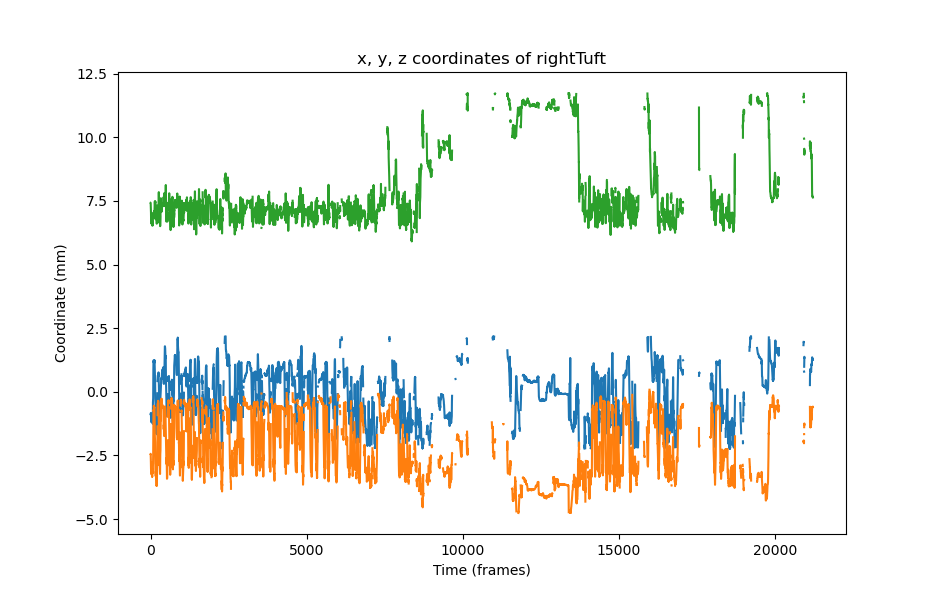

Text(0.5, 1.0, 'x, y, z coordinates of rightTuft')

In [31]:
# plot the x, y, z coordinates of joint 1

import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(figsize=(9.4, 6))
plt.plot(bodyparts_3d_anipose[('weikang','dodson','rightTuft','x')])
plt.plot(bodyparts_3d_anipose[('weikang','dodson','rightTuft','y')])
plt.plot(bodyparts_3d_anipose[('weikang','dodson','rightTuft','z')])
plt.xlabel("Time (frames)")
plt.ylabel("Coordinate (mm)")
plt.title("x, y, z coordinates of {}".format('rightTuft'))

<IPython.core.display.Javascript object>


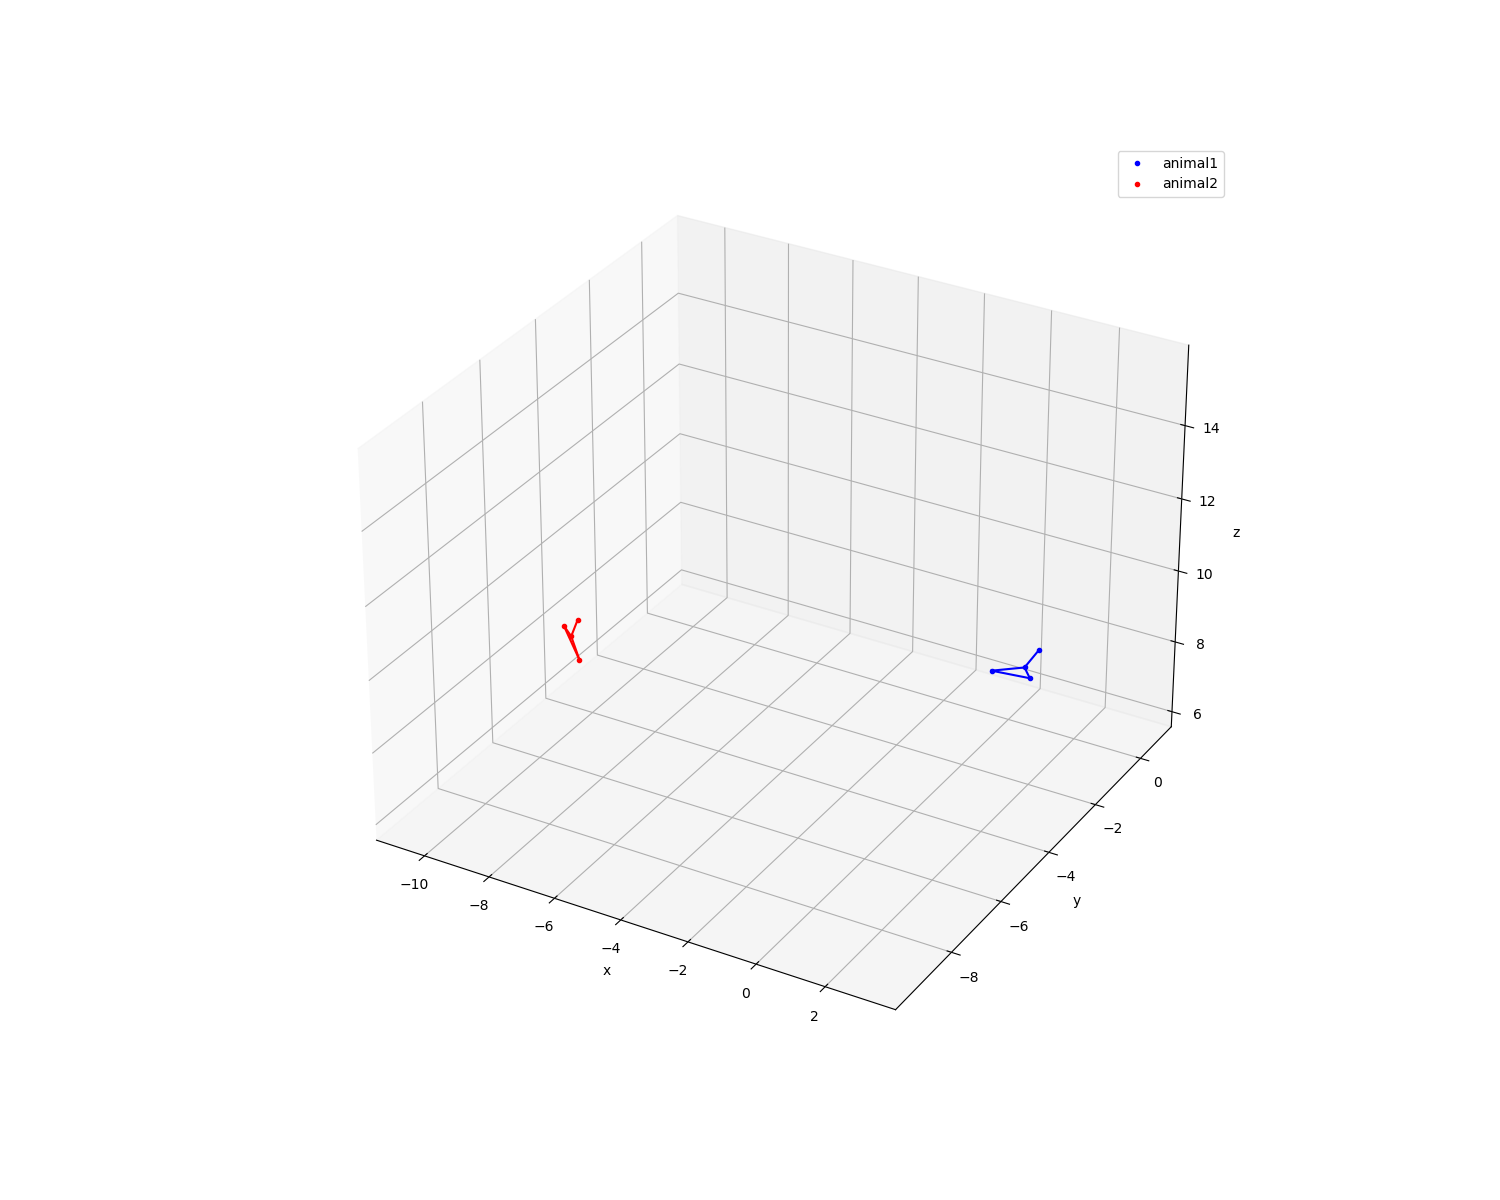

printing frame  31 / 330
printing frame  32 / 330
printing frame  33 / 330
printing frame  34 / 330
printing frame  35 / 330
printing frame  36 / 330
printing frame  37 / 330
printing frame  38 / 330
printing frame  39 / 330
printing frame  40 / 330
printing frame  41 / 330
printing frame  42 / 330
printing frame  43 / 330
printing frame  44 / 330
printing frame  45 / 330
printing frame  46 / 330
printing frame  47 / 330
printing frame  48 / 330
printing frame  49 / 330
printing frame  50 / 330
printing frame  51 / 330
printing frame  52 / 330
printing frame  53 / 330
printing frame  54 / 330
printing frame  55 / 330
printing frame  56 / 330
printing frame  57 / 330
printing frame  58 / 330
printing frame  59 / 330
printing frame  60 / 330
printing frame  61 / 330
printing frame  62 / 330
printing frame  63 / 330
printing frame  64 / 330
printing frame  65 / 330
printing frame  66 / 330
printing frame  67 / 330
printing frame  68 / 330
printing frame  69 / 330
printing frame  70 / 330


In [32]:
## plot the example videos

import sys
sys.path.append('/home/ws523/marmoset_tracking_DLCv2/following_up_analysis/3d_recontruction_analysis_self_and_coop_task/ana_functions')
from tracking_video_3d_demo import tracking_video_3d_demo

animalnames_videotrack = ['dodson','scorch']
bodypartnames_videotrack = ['rightTuft','whiteBlaze','leftTuft','rightEye','leftEye','mouth']
animal1_filename = animal1
animal2_filename = animal2
session_start_time = 1.00
fps = 30
nframes = 10*fps

current_dir = os.getcwd()
add_date_dir = current_dir+'/anipose_3d_demo_videos/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename
if not os.path.exists(add_date_dir):
    os.makedirs(add_date_dir)
video_file = add_date_dir+'/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename+'_anipose_3d_tracking_demo.mp4'

tracking_video_3d_demo(bodyparts_3d_anipose['weikang'],animalnames_videotrack,bodypartnames_videotrack,date_tgt,animal1_filename,animal2_filename,session_start_time,fps,nframes,video_file)

<IPython.core.display.Javascript object>


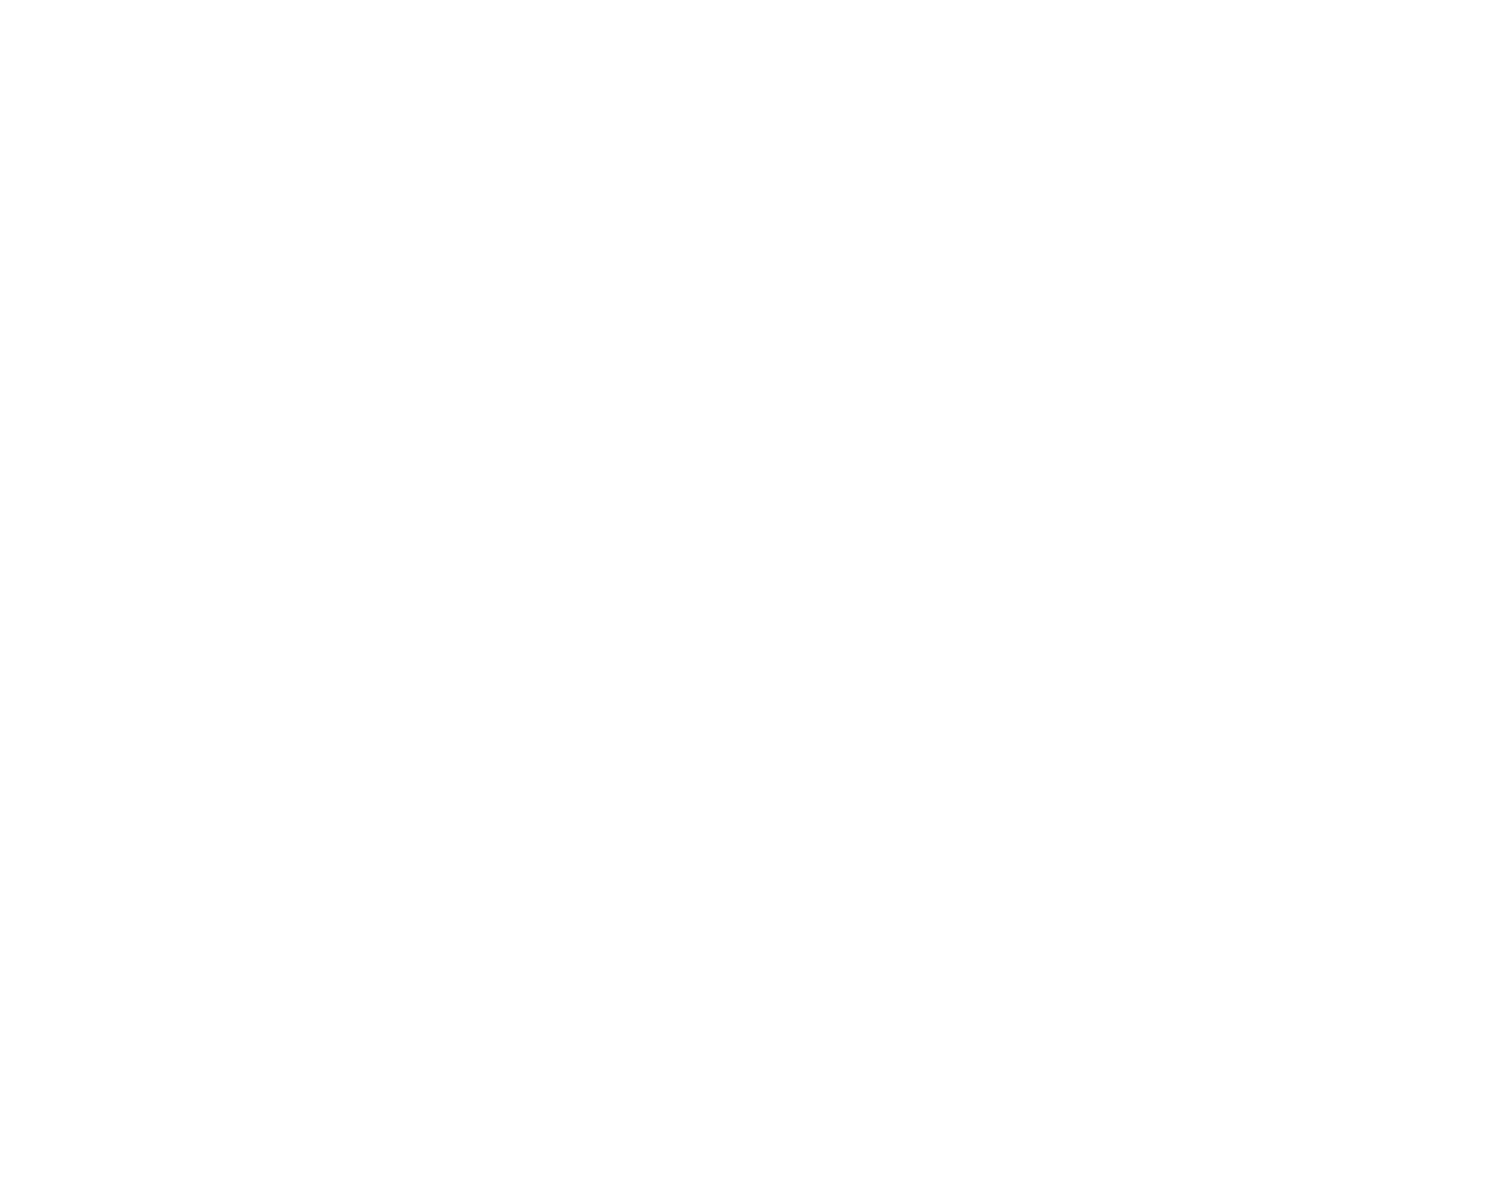

printing frame  31 / 330
printing frame  32 / 330
printing frame  33 / 330
printing frame  34 / 330
printing frame  35 / 330
printing frame  36 / 330
printing frame  37 / 330
printing frame  38 / 330
printing frame  39 / 330
printing frame  40 / 330
printing frame  41 / 330
printing frame  42 / 330
printing frame  43 / 330
printing frame  44 / 330
printing frame  45 / 330
printing frame  46 / 330
printing frame  47 / 330
printing frame  48 / 330
printing frame  49 / 330
printing frame  50 / 330
printing frame  51 / 330
printing frame  52 / 330
printing frame  53 / 330
printing frame  54 / 330
printing frame  55 / 330
printing frame  56 / 330
printing frame  57 / 330
printing frame  58 / 330
printing frame  59 / 330
printing frame  60 / 330
printing frame  61 / 330
printing frame  62 / 330
printing frame  63 / 330
printing frame  64 / 330
printing frame  65 / 330
printing frame  66 / 330
printing frame  67 / 330
printing frame  68 / 330
printing frame  69 / 330
printing frame  70 / 330


<IPython.core.display.Javascript object>


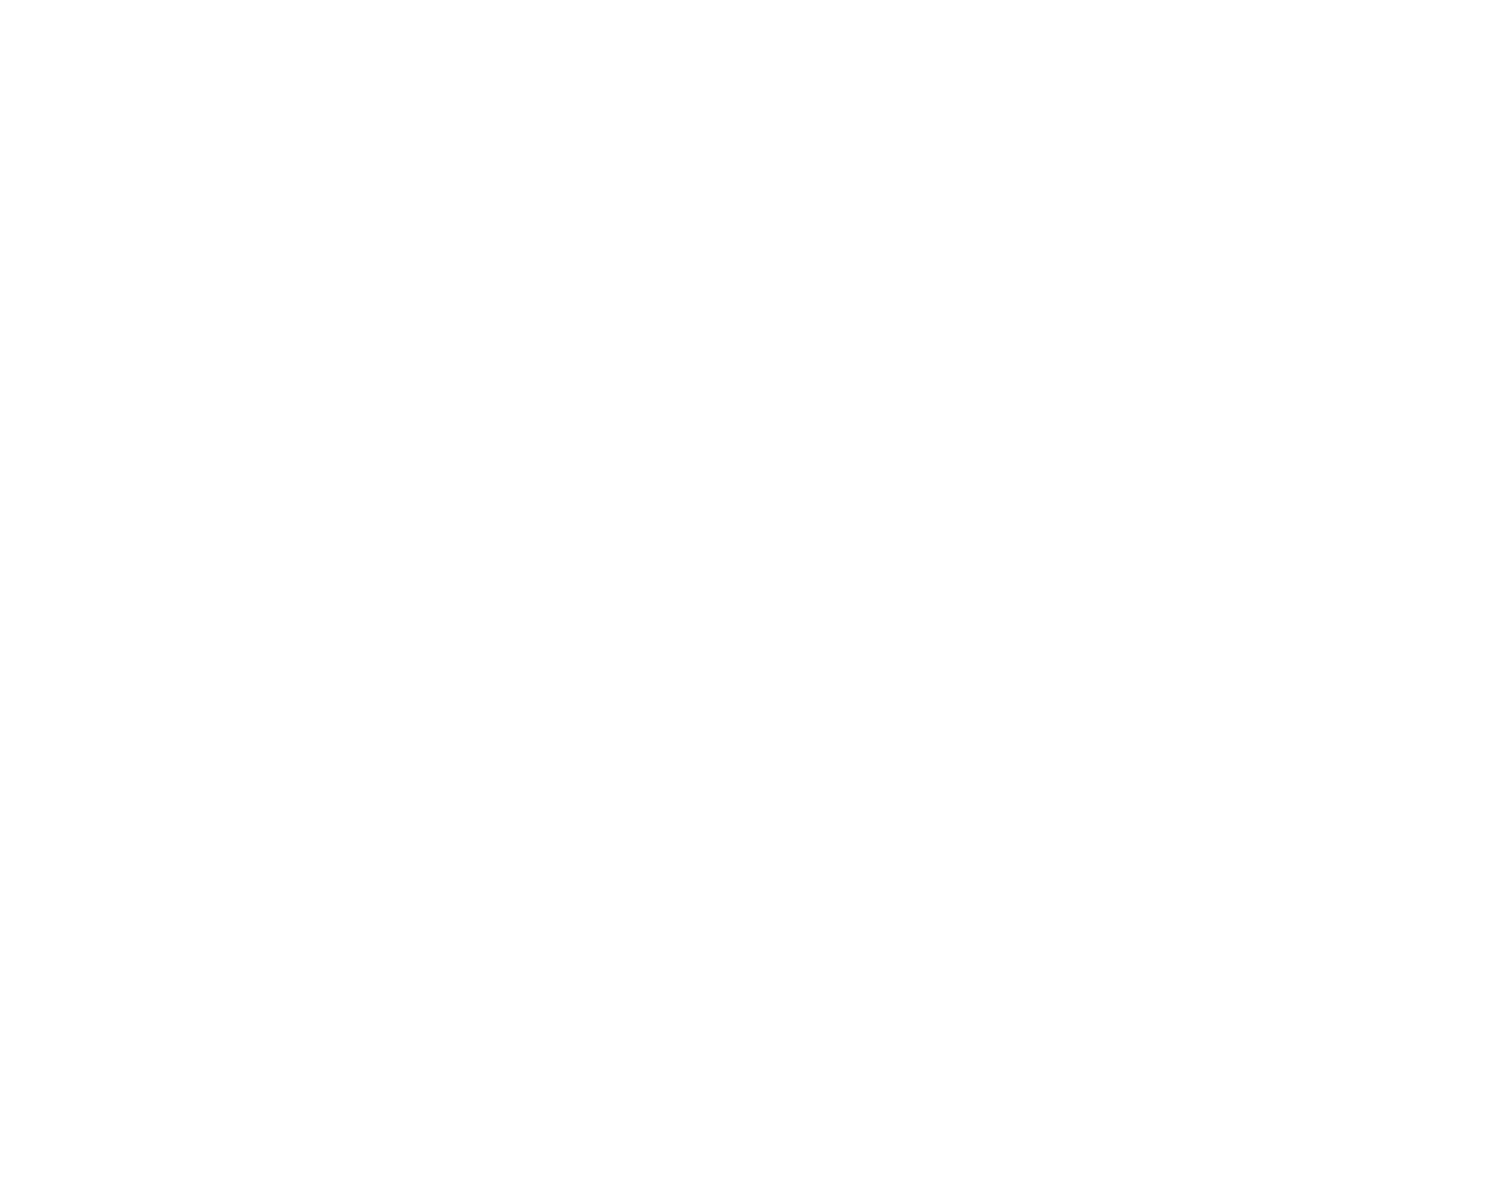

printing frame  31 / 330
printing frame  32 / 330
printing frame  33 / 330
printing frame  34 / 330
printing frame  35 / 330
printing frame  36 / 330
printing frame  37 / 330
printing frame  38 / 330
printing frame  39 / 330
printing frame  40 / 330
printing frame  41 / 330
printing frame  42 / 330
printing frame  43 / 330
printing frame  44 / 330
printing frame  45 / 330
printing frame  46 / 330
printing frame  47 / 330
printing frame  48 / 330
printing frame  49 / 330
printing frame  50 / 330
printing frame  51 / 330
printing frame  52 / 330
printing frame  53 / 330
printing frame  54 / 330
printing frame  55 / 330
printing frame  56 / 330
printing frame  57 / 330
printing frame  58 / 330
printing frame  59 / 330
printing frame  60 / 330
printing frame  61 / 330
printing frame  62 / 330
printing frame  63 / 330
printing frame  64 / 330
printing frame  65 / 330
printing frame  66 / 330
printing frame  67 / 330
printing frame  68 / 330
printing frame  69 / 330
printing frame  70 / 330


In [33]:
## plot the example videos
## for comparison make the video based on DLC's own 3d recontruction

twocamera_videos_cam12 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1+"_"+animal2+"_camera12/"
twocamera_videos_cam23 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1+"_"+animal2+"_camera23/"

bodyparts_cam1_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered.h5"
bodyparts_cam2_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered.h5"
bodyparts_cam3_cam23 = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered.h5"

bodyparts_3d_cam12_DLC = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_weikang.h5"
bodyparts_3d_cam23_DLC = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_weikang.h5"

singlecam_ana_type = "DLC_dlcrnetms5_marmoset_tracking_with_middle_cameraSep1shuffle1_150000"

bodyparts_3d_cam12_DLC_data = pd.read_hdf(bodyparts_3d_cam12_DLC)
bodyparts_3d_cam23_DLC_data = pd.read_hdf(bodyparts_3d_cam23_DLC)


# camera 12 pair

import sys
sys.path.append('/home/ws523/marmoset_tracking_DLCv2/following_up_analysis/3d_recontruction_analysis_self_and_coop_task/ana_functions')
from tracking_video_3d_demo import tracking_video_3d_demo

animalnames_videotrack = ['dodson','scorch']
bodypartnames_videotrack = ['rightTuft','whiteBlaze','leftTuft','rightEye','leftEye','mouth']
animal1_filename = animal1
animal2_filename = animal2
session_start_time = 1.00
fps = 30
nframes = 10*fps

current_dir = os.getcwd()
add_date_dir = current_dir+'/DLC_cam12_3d_demo_videos/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename
if not os.path.exists(add_date_dir):
    os.makedirs(add_date_dir)
video_file = add_date_dir+'/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename+'_DLCcam12_3d_tracking_demo.mp4'

tracking_video_3d_demo(bodyparts_3d_cam12_DLC_data['weikang'],animalnames_videotrack,bodypartnames_videotrack,date_tgt,animal1_filename,animal2_filename,session_start_time,fps,nframes,video_file)



# camera 23 pair

import sys
sys.path.append('/home/ws523/marmoset_tracking_DLCv2/following_up_analysis/3d_recontruction_analysis_self_and_coop_task/ana_functions')
from tracking_video_3d_demo import tracking_video_3d_demo

animalnames_videotrack = ['dodson','scorch']
bodypartnames_videotrack = ['rightTuft','whiteBlaze','leftTuft','rightEye','leftEye','mouth']
animal1_filename = animal1
animal2_filename = animal2
session_start_time = 1.00
fps = 30
nframes = 10*fps

current_dir = os.getcwd()
add_date_dir = current_dir+'/DLC_cam23_3d_demo_videos/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename
if not os.path.exists(add_date_dir):
    os.makedirs(add_date_dir)
video_file = add_date_dir+'/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename+'_DLCcam23_3d_tracking_demo.mp4'

tracking_video_3d_demo(bodyparts_3d_cam23_DLC_data['weikang'],animalnames_videotrack,bodypartnames_videotrack,date_tgt,animal1_filename,animal2_filename,session_start_time,fps,nframes,video_file)









In [34]:

bodyparts_locs_3d = bodyparts_3d_anipose['weikang']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy
import string
import warnings
import pickle
import cv2
import os   
import matplotlib.animation as animation

import warnings
warnings.filterwarnings("ignore")    

skeletons = [ ['rightTuft','rightEye'],
              ['rightTuft','whiteBlaze'],
              ['leftTuft','leftEye'],
              ['leftTuft','whiteBlaze'],
              ['rightEye','whiteBlaze'],
              ['leftEye','whiteBlaze'],
              ['rightEye','mouth'],
              ['leftEye','mouth'],
              ['leftEye','rightEye']
            ]
nskeletons = np.shape(skeletons)[0]

colors = ['b','r','k']


# Settings
clear_frames = True     # Should it clear the figure between each frame?
fps = 30

# Output video writer
FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Animal tracking demo', artist='Matplotlib', comment='')
writer = FFMpegWriter(fps=fps, metadata=metadata)

# animal_names_unique = pd.unique(pd.DataFrame(bodyparts_locs_3d.keys()).iloc[:,0])
# body_parts_unique = pd.unique(pd.DataFrame(bodyparts_locs_3d.keys()).iloc[:,1])
animal_names_unique = animalnames_videotrack
body_parts_unique = bodypartnames_videotrack    

nanimals = np.shape(animal_names_unique)[0]  
nbodyparts = np.shape(body_parts_unique)[0]

for iname in np.arange(0,nanimals,1):
    for ibody in np.arange(0,nbodyparts,1):
        if (iname == 0) & (ibody == 0):
            xxx = np.array(bodyparts_locs_3d[(animal_names_unique[iname],body_parts_unique[ibody])])
        else:
            xxx2 = np.array(bodyparts_locs_3d[(animal_names_unique[iname],body_parts_unique[ibody])])
            xxx = np.concatenate([xxx,xxx2])
xyz_min = np.nanmin(xxx,axis=0)
xyz_max = np.nanmax(xxx,axis=0)

In [35]:
xyz_max

array([ 3.69943816,  1.1705901 , 15.94571576])